# Question 1: Data Analysis with SQL and Python

In [1]:
# Import Python Libraries
import pandas as pd
import sqlite3
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Online Retail dataset from UCI Machine Learning Repository's Online Retail Dataset
file_path = 'Online Retail.xlsx'
online_retail = pd.read_excel(file_path, engine='openpyxl')

In [4]:
# Connect to a SQLite database
conn = sqlite3.connect('retail_info.db')
cursor = conn.cursor()

# Create a table with the desired schema
create_table_query = '''
CREATE TABLE IF NOT EXISTS OnlineRetail (
    InvoiceNo INT,
    StockCode NVARCHAR(50),
    Description NVARCHAR(255),
    Quantity INT,
    InvoiceDate DATETIME,
    UnitPrice FLOAT,
    CustomerID INT,
    Country NVARCHAR(50),
    PRIMARY KEY (InvoiceNo, StockCode)
)
'''

cursor.execute(create_table_query)
conn.commit()

In [5]:
# Load the online_retail df into the OnlineRetail SQL table
online_retail.to_sql('OnlineRetail', conn, if_exists='replace', index=False)

In [6]:
# Query the database to verify
query = "SELECT * FROM OnlineRetail LIMIT 10"
df = pd.read_sql(query, conn)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


## Find the top 10 customers by total purchase amount.

In [7]:
# Find the top 10 customers by total purchase amount.
query_1_2_1 = """
SELECT
    CustomerID,
    SUM(UnitPrice * Quantity) AS TotalPurchaseAmount
FROM
    OnlineRetail
WHERE
    CustomerID IS NOT NULL
GROUP BY
    CustomerID
ORDER BY
    TotalPurchaseAmount DESC
LIMIT 10;
"""

# Execute the query and return the results
df_top_customers = pd.read_sql(query_1_2_1, conn)
df_top_customers

,CustomerID,TotalPurchaseAmount
0,14646.0,279489.02
1,18102.0,256438.49
2,17450.0,187482.17
3,14911.0,132572.62
4,12415.0,123725.45
5,14156.0,113384.14
6,17511.0,88125.38
7,16684.0,65892.08
8,13694.0,62653.10
9,15311.0,59419.34


## Identify the most popular products based on the number of orders.

In [8]:
# Identify the most popular products based on the number of orders.
query_1_2_2 = """
SELECT
    StockCode,
    Description,
    COUNT(*) AS NumberOfOrders
FROM
    OnlineRetail
WHERE
    StockCode IS NOT NULL
GROUP BY
    StockCode, Description
ORDER BY
    NumberOfOrders DESC
LIMIT 20;
"""

# Execute the query and return the results
df_top_products = pd.read_sql(query_1_2_2, conn)
df_top_products

,StockCode,Description,NumberOfOrders
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
5,84879,ASSORTED COLOUR BIRD ORNAMENT,1501
6,22720,SET OF 3 CAKE TINS PANTRY DESIGN,1473
7,21212,PACK OF 72 RETROSPOT CAKE CASES,1385
8,20727,LUNCH BAG BLACK SKULL.,1350
9,22457,NATURAL SLATE HEART CHALKBOARD,1280


## Calculate the monthly revenue for the dataset's time range.

In [9]:
# Calculate the monthly revenue for the dataset's time range.
query_1_2_3 = """
SELECT
    strftime('%Y-%m', InvoiceDate) AS Month,
    ROUND(SUM(UnitPrice * Quantity), 2) AS MonthlyRevenue
FROM
    OnlineRetail
WHERE
    InvoiceDate IS NOT NULL
GROUP BY
    strftime('%Y-%m', InvoiceDate)
ORDER BY
    Month;
"""

# Execute the query and return the results
df_monthly_revenue = pd.read_sql(query_1_2_3, conn)
df_monthly_revenue

,Month,MonthlyRevenue
0,2010-12,748957.02
1,2011-01,560000.26
2,2011-02,498062.65
3,2011-03,683267.08
4,2011-04,493207.12
5,2011-05,723333.51
6,2011-06,691123.12
7,2011-07,681300.11
8,2011-08,682680.51
9,2011-09,1019687.62


## Generate visualizations (e.g., bar charts, line graphs) for the analysis performed.

In [10]:
# Top 10 Customers by Total Purchase Amount
df_top_customers_sort = df_top_customers.sort_values(by='TotalPurchaseAmount', ascending=False)
df_top_customers_sort

,CustomerID,TotalPurchaseAmount
0,14646.0,279489.02
1,18102.0,256438.49
2,17450.0,187482.17
3,14911.0,132572.62
4,12415.0,123725.45
5,14156.0,113384.14
6,17511.0,88125.38
7,16684.0,65892.08
8,13694.0,62653.10
9,15311.0,59419.34


In [11]:
# Convert 'CustomerID' column to string
df_top_customers_sort['CustomerID'] = df_top_customers_sort['CustomerID'].astype(int).astype(str)

In [12]:
# Create a new column for total purchase amount in thousands
df_top_customers_sort['TotalPurchaseAmountK'] = df_top_customers_sort['TotalPurchaseAmount'] / 1000

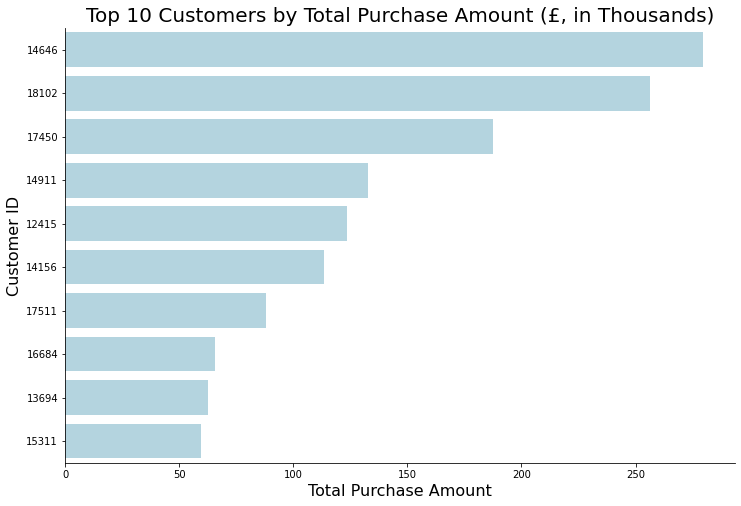

In [13]:
#Plot a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='TotalPurchaseAmountK', y='CustomerID', data=df_top_customers_sort, palette=['lightblue'])
plt.title('Top 10 Customers by Total Purchase Amount (£, in Thousands)', fontsize=20)
plt.xlabel('Total Purchase Amount', fontsize=16)
plt.ylabel('Customer ID', fontsize=16)
sns.despine(left=False, bottom=False)
plt.show()

In [14]:
#Most Popular Products by Number of Orders
df_top_products_top5 = df_top_products.sort_values(by='NumberOfOrders', ascending=False).head(5)
df_top_products_top5

,StockCode,Description,NumberOfOrders
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638


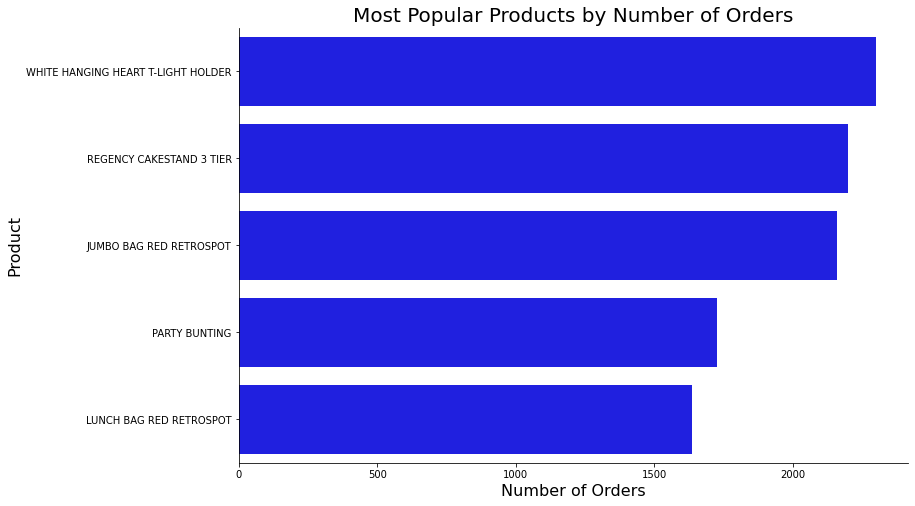

In [15]:
plt.figure(figsize=(12, 8))
sns.barplot(x='NumberOfOrders', y='Description', data=df_top_products_top5, palette=['blue'])
plt.title('Most Popular Products by Number of Orders', fontsize=20)
plt.xlabel('Number of Orders', fontsize=16)
plt.ylabel('Product', fontsize=16)
sns.despine(left=False, bottom=False)
plt.show()

In [16]:
# The Monthly Revenue Line Chart
# Create a new column for total purchase amount in thousands
df_monthly_revenue['MonthlyRevenueK'] = df_monthly_revenue['MonthlyRevenue'] / 1000

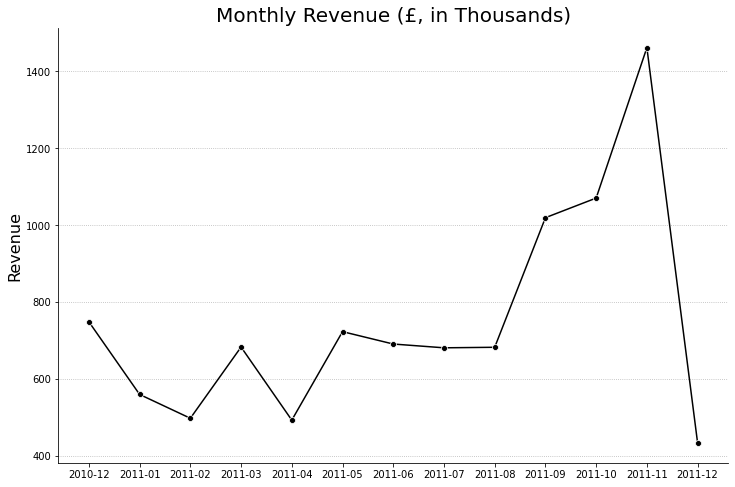

In [17]:
# Plot a line chart
plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='MonthlyRevenueK', data=df_monthly_revenue, marker='o', color='black')
plt.title('Monthly Revenue (£, in Thousands)', fontsize=20)
plt.xlabel('')
plt.ylabel('Revenue', fontsize=16)
plt.grid(axis='y', linestyle=':')
sns.despine(left=False, bottom=False)
plt.show()

In [18]:
# Close the connection
conn.close()